# PCMCI testing from Thomas change

$$
Eqation: T_{S,i+1} = T_{S,i} + \Delta t \cdot \frac{1}{\tau} [-T_{N,i} - T_{S,i}]
$$


In [ ]:
##TESTING

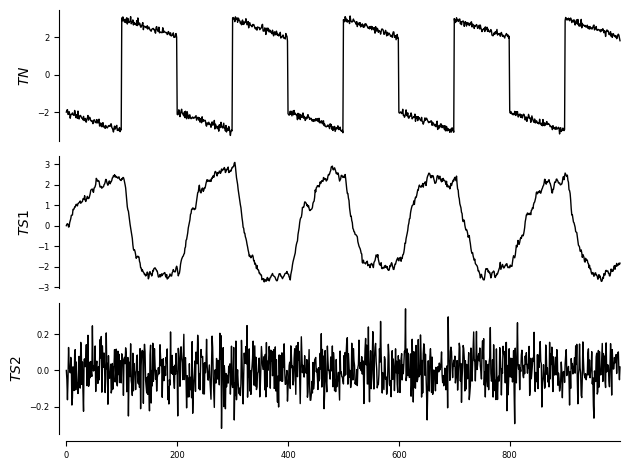

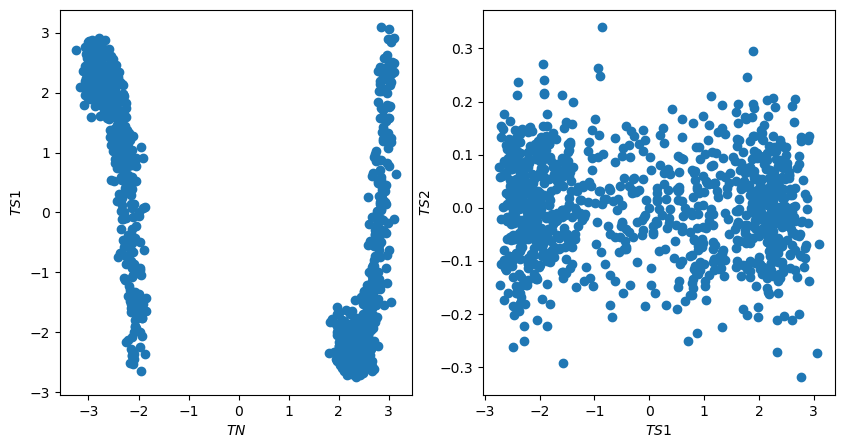

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tigramite
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import parcorr, gpdc, cmiknn
import pandas as pd
from scipy import signal
mydata = pd.read_csv("realdata.csv")
#mydata = np.transpose(mydata)
t = np.linspace(0, 1, 1000, endpoint=False)
#print(mydata.iloc[:,[2]])
TN = -1*(signal.sawtooth(2 * np.pi * 5 * t))-3*(signal.square(2 * np.pi * 5 * t))
#TN = np.random.normal(size=1000)
#TN = (mydata.iloc[:,[2]])
#TN = mydata[:,2]
#print(TN)
# Parameters for the model
tau = 25  # Characteristic timescale in years
TS_initial = 0  # Initial condition for TS


# Calculate TS without noise, reversing the calculation direction
TS1 = np.zeros(len(TN))
TS2 = np.zeros(len(TN))

TS1[0] = TS_initial
TS2[0] = TS_initial

for i in range(1, len(TN)):
    TN[i] = TN[i] + np.random.normal(0, 0.1)
    TS1[i] = TS1[i-1] + (1/tau) * (-TN[i-5]-TS1[i-5])+np.random.normal(0, 0.1)
   # TS1[i] =  np.random.normal(0, 0.1)
   # TS2[i] = TS2[i-1] + (1/tau) * (-TS2[i-1] + TN[i-1])+np.random.normal(0, 0.1)
    TS2[i] = TS2[i] + np.random.normal(0, 0.1)

data = np.array([TN, TS1, TS2]).T


var_names = [r'$TN$', r'$TS1$', r'$TS2$']

dataframe = pp.DataFrame(data, var_names=var_names)
tp.plot_timeseries(dataframe); plt.show()


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel(var_names[0])
plt.ylabel(var_names[1])

plt.subplot(1, 2, 2)
plt.scatter(data[:, 1], data[:, 2])
plt.xlabel(var_names[1])
plt.ylabel(var_names[2])

plt.show()


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 75
pc_alpha = [0.01]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable $TN$ has 1 link(s):
        ($TN$ -1): max_pval = 0.00000, |min_val| =  0.691

    Variable $TS1$ has 2 link(s):
        ($TS1$ -1): max_pval = 0.00000, |min_val| =  0.805
        ($TN$ -5): max_pval = 0.00000, |min_val| =  0.231

    Variable $TS2$ has 3 link(s):
        ($TS2$ -71): max_pval = 0.00186, |min_val| =  0.107
        ($TS2$ -17): max_pval = 0.00193, |min_val| =  0.106
        ($TN$ -16): max_pval = 0.00855, |min_val| =  0.090

##
## Step 2: MCI algorithm
##

Parameters:

independence test = par_corr
tau_min = 1
tau_max = 75
max_conds_py = None
max_conds_px = None

## Significant links at alpha = 0.01:

    Variable $TN$ has 3 link(s):
        ($TN$ -1): pval = 0.00000 | val =  0.691
        ($TS1$ -13): pval = 0.00061 | val = -0

(<Figure size 640x480 with 1 Axes>, <Axes: >)

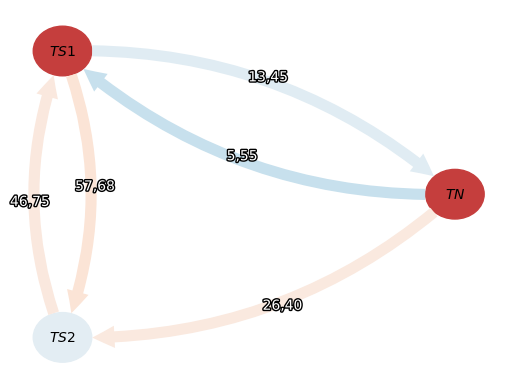

In [3]:
ParCorr = parcorr.ParCorr(significance='analytic')

pcmci_parcorr = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=ParCorr,
    verbosity=1)
results = pcmci_parcorr.run_pcmci(tau_min=1,tau_max=75, pc_alpha=0.01, alpha_level = 0.01)
tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    show_colorbar=False,
    )